<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

##**Tugas *2*: *Classification***

###**Tenggat Waktu: 19 November 2022, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Tugas2_NPM_Nama.ipynb**. Contoh: A_Tugas2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **19 November 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [249]:
# Isi dengan data diri Anda
NAMA = "FRIGAS HANIFYAN ZALWI"
KELAS = "B"
NPM = "2006596005"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ["1906400154", "1906398383", "1706024734", "2006485781", "2006597815"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6",
"https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/",
"https://www.naukri.com/learning/articles/how-to-set-the-value-of-k-in-k-fold-cross-validation/",
"https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/",
"https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html",
"https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html",
"https://www.statology.org/k-fold-cross-validation-in-python/"
]

In [250]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, FRIGAS HANIFYAN ZALWI dari kelas B dengan NPM 2006596005, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (FRIGAS HANIFYAN ZALWI)


In [251]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

## **Dataset**

Dataset yang digunakan adalah dataset Mobile Prices dimana kita memklasifikasi handphone lewat harganya, terdapat 21 atribut dan target atributnya adalah price_range.

Penjelesan atribut:
* battery_power : Total energy a battery can store in one time measured in mAh
* blue : Has bluetooth or not
* clock_speed : speed at which microprocessor executes instructions
* dual_sim : Has dual sim support or not
* fc : Front Camera mega pixels
* four_g : Has 4G or not
* int_memory : Internal Memory in Gigabytes
* m_dep : Mobile Depth in cm
* mobile_wt : Weight of mobile phone
* n_cores : Number of cores of processor
* pc : Primary Camera mega pixels
* px_height : Pixel Resolution Height
* px_width : Pixel Resolution Width
* ram : Random Access Memory in Mega Bytes
* sc_h : Screen Height of mobile in cm
* sc_w : Screen Width of mobile in cm
* talk_time : Longest time that a single battery charge will last when you are
* three_g : Has 3G or not
* touch_screen : Has touch screen or not
* wifi : Has wifi or not
* price_range : This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

Sumber: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification (dengan modifikasi)

## [25] **Preprocessing**

**Pada bagian ini Anda akan diminta untuk melakukan preprocessing dan eksplorasi data sebelum data digunakan dalam model klasifikasi.**

1\. [3] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [252]:
data_mp = pd.read_csv("mobile_phone.csv")
data_mp.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2021.000000,2021.000000,1920.000000,2021.000000,2021.000000,2021.000000,1915.000000,1928.000000,2021.000000,2021.000000,...,2021.000000,2021.000000,1927.000000,2021.000000,2021.000000,1937.000000,2021.000000,1925.000000,1922.000000,2021.000000
mean,1239.205344,0.492331,1.521302,0.505690,4.303810,0.523998,32.086162,0.501556,140.272143,4.532905,...,646.858981,1249.240970,2120.320187,12.323602,5.790203,11.022716,0.762494,0.504935,0.506243,1.503216
std,439.916748,0.500065,0.816020,0.500091,4.330382,0.499547,18.198040,0.289261,35.393281,2.291511,...,445.159739,433.141437,1079.774853,4.213155,4.369054,5.459042,0.425660,0.500106,0.500091,1.114537
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,284.000000,874.000000,1210.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,1.000000
50%,1230.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,567.000000,1245.000000,2130.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.000000,1633.000000,3033.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [253]:
data_mp.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram              float64
sc_h               int64
sc_w               int64
talk_time        float64
three_g            int64
touch_screen     float64
wifi             float64
price_range        int64
dtype: object

In [254]:
# cek null value
data_mp.isnull().sum()

battery_power      0
blue               0
clock_speed      101
dual_sim           0
fc                 0
four_g             0
int_memory       106
m_dep             93
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram               94
sc_h               0
sc_w               0
talk_time         84
three_g            0
touch_screen      96
wifi              99
price_range        0
dtype: int64

In [255]:
#cek duplicate
data_duplicated = data_mp.duplicated(keep=False).reset_index()
data_duplicated.columns = ["index", "duplicated data"]
data_duplicated.pop("index")
true_data = data_duplicated.loc[data_duplicated["duplicated data"] == True]

display(true_data.size)

30

Pada cek duplicate ini saya menggunakan keep=False sehingga data pertama yang terdeteksi duplicate juga terhitung sebagai True nantinya, apabila menggunakan by default (keep='first') akan menghasilkan 21 akibat data pertama yang duplicate akan terhitung sebagai false

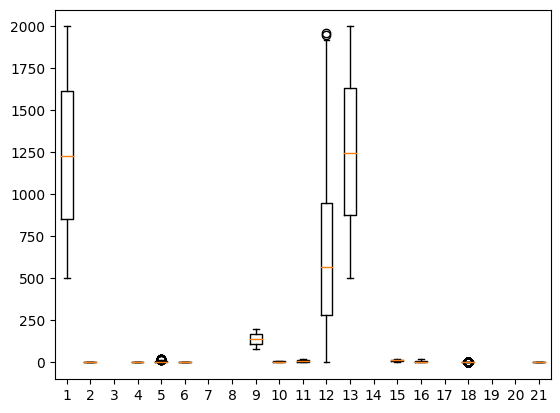

In [256]:
# cek outliers
plt.boxplot(data_mp)

plt.xticks()
 
# show plot
plt.show()

In [257]:
lst_column = data_mp.columns
lst_column

def cek_outlier(df, col):
    # Menghitung Q1, Q3, dan Interquartile (IQR)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Mengitung upper limit dan lower limit
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    df_min = (df[col] < lower).sum()
    df_max = (df[col] > upper).sum()
    return df_min + df_max

for i in lst_column :
    display(i + " : " + str(cek_outlier(data_mp, i)))

'battery_power : 0'

'blue : 0'

'clock_speed : 0'

'dual_sim : 0'

'fc : 18'

'four_g : 0'

'int_memory : 0'

'm_dep : 0'

'mobile_wt : 0'

'n_cores : 0'

'pc : 0'

'px_height : 2'

'px_width : 0'

'ram : 0'

'sc_h : 0'

'sc_w : 0'

'talk_time : 0'

'three_g : 480'

'touch_screen : 0'

'wifi : 0'

'price_range : 0'

2\. [3] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil klasifikasi yang maksimal.

In [258]:
data_mp

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7.0,0.6,188,2,...,20,756,2549.0,9,7,NaN,0,0.0,1.0,1
1,1021,1,0.5,1,0,1,53.0,0.7,136,3,...,905,1988,2631.0,17,3,7.0,1,1.0,0.0,2
2,563,1,0.5,1,2,1,41.0,0.9,145,5,...,1263,1716,2603.0,11,2,9.0,1,1.0,0.0,2
3,615,1,2.5,0,0,0,10.0,0.8,131,6,...,1216,1786,2769.0,16,8,11.0,1,0.0,0.0,2
4,1821,1,1.2,0,13,1,44.0,NaN,141,2,...,1208,1212,1411.0,8,2,15.0,1,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,794,1,0.5,1,0,1,2.0,0.8,106,6,...,1222,1890,668.0,13,4,19.0,1,1.0,0.0,0
2017,1965,1,2.6,1,0,0,39.0,NaN,187,4,...,915,1965,2032.0,11,10,16.0,1,1.0,1.0,2
2018,1911,0,0.9,1,1,1,36.0,0.7,108,8,...,868,1632,3057.0,9,1,5.0,1,1.0,0.0,3
2019,1512,0,0.9,0,4,1,46.0,NaN,145,5,...,336,670,869.0,18,10,19.0,1,1.0,1.0,0


In [259]:
data_mp["touch_screen"].fillna(data_mp["touch_screen"].mode()[0], inplace=True)
data_mp["wifi"].fillna(data_mp["wifi"].mode()[0], inplace=True)


data_mp["clock_speed"].fillna(data_mp["clock_speed"].median(), inplace=True)
data_mp["int_memory"].fillna(data_mp["int_memory"].median(), inplace=True)
data_mp["m_dep"].fillna(data_mp["m_dep"].median(), inplace=True)
data_mp["ram"].fillna(data_mp["ram"].median(), inplace=True)
data_mp["talk_time"].fillna(data_mp["talk_time"].median(), inplace=True)








In [260]:
data_mp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [261]:
data_mp.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory       float64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram              float64
sc_h               int64
sc_w               int64
talk_time        float64
three_g            int64
touch_screen     float64
wifi             float64
price_range        int64
dtype: object

In [262]:
new_data = data_mp.drop_duplicates()
data_duplicated = new_data.duplicated(keep=False).reset_index()
data_duplicated.columns = ["index", "duplicated data"]
data_duplicated.pop("index")
true_data = data_duplicated.loc[data_duplicated["duplicated data"] == True]

display(true_data.size)

0

Karena persebaran data normal, nilai outliers tidak terlalu jauh dan outliers relatif sedikit, jadi outliers saya biarkan saja. Dengan demikian, nilai-nilai outliers tidak dihapus

3\. [3] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!


> Jawaban: 

> Perlu dilakukan normalisasi karena range nilai dari antar kolum yang berbeda bisa tidak sama. Dengan demikian, saya menggunakan minmaxscaler untuk feature yang akan saya gunakan nanti. Hal itu dikarenakan nilai outlier tidak terlalu jauh dari batas atas maupun batas bawah. Selain itu perubahan nantinya menghasilkan nilai di rentang antara 0-1 sehingga seluruh data memiliki range yang sama.

4\. [10] Sebelum data diproses lebih lanjut lakukan *feature selection* dengan memilih beberapa fitur yang paling optimal untuk mengklasifikasikan label target!

In [263]:

X_raw = data_mp.drop(["price_range"],axis=1)
y = data_mp["price_range"]

In [264]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

selector = SelectKBest(f_classif, k=4) # kita akan memilih 4 variable terbaik dari features kita

X = selector.fit_transform(X_raw, y)

print("Jumlah feature (sebelum dilakukan feature selection ) :", X_raw.shape[1])
print("Jumlah feature (setelah dilakukan feature selection ) :", X.shape[1])

Jumlah feature (sebelum dilakukan feature selection ) : 20
Jumlah feature (setelah dilakukan feature selection ) : 4


5\. [6] Apa saja fitur-fitur yang terpilih hasil dari *feature selection*? Jelaskan strategi Anda dalam memilih fitur-fitur tersebut dan berikan analisis mengapa fitur tersebut cocok digunakan untuk mengklasifikasi label target!

In [265]:
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

array(['battery_power', 'px_height', 'px_width', 'ram'], dtype=object)

In [266]:
from scipy.stats import pearsonr

for i in lst_column :
    if i != "price_range" :
        corr, _ = pearsonr(data_mp[i], data_mp["price_range"])
        if corr > 0.1 :
            print(i + " : " + str(corr))

battery_power : 0.19940788577991583
px_height : 0.15334147406710172
px_width : 0.16592974147343956
ram : 0.892520888657383


> Jawaban: 

> Strategi pemilihan saya menggunakan feature selction pada nomor 4 yang dimana hasilnya adalah 'battery_power', 'px_height', 'px_width', 'ram'. Hal itu didukung dari korelasi yang dihasilkan 4 fitur tersebut dengan price_range adalah korelasi yang positif. Hal ini dapat dibuktikan juga dengan melihat heat map nya

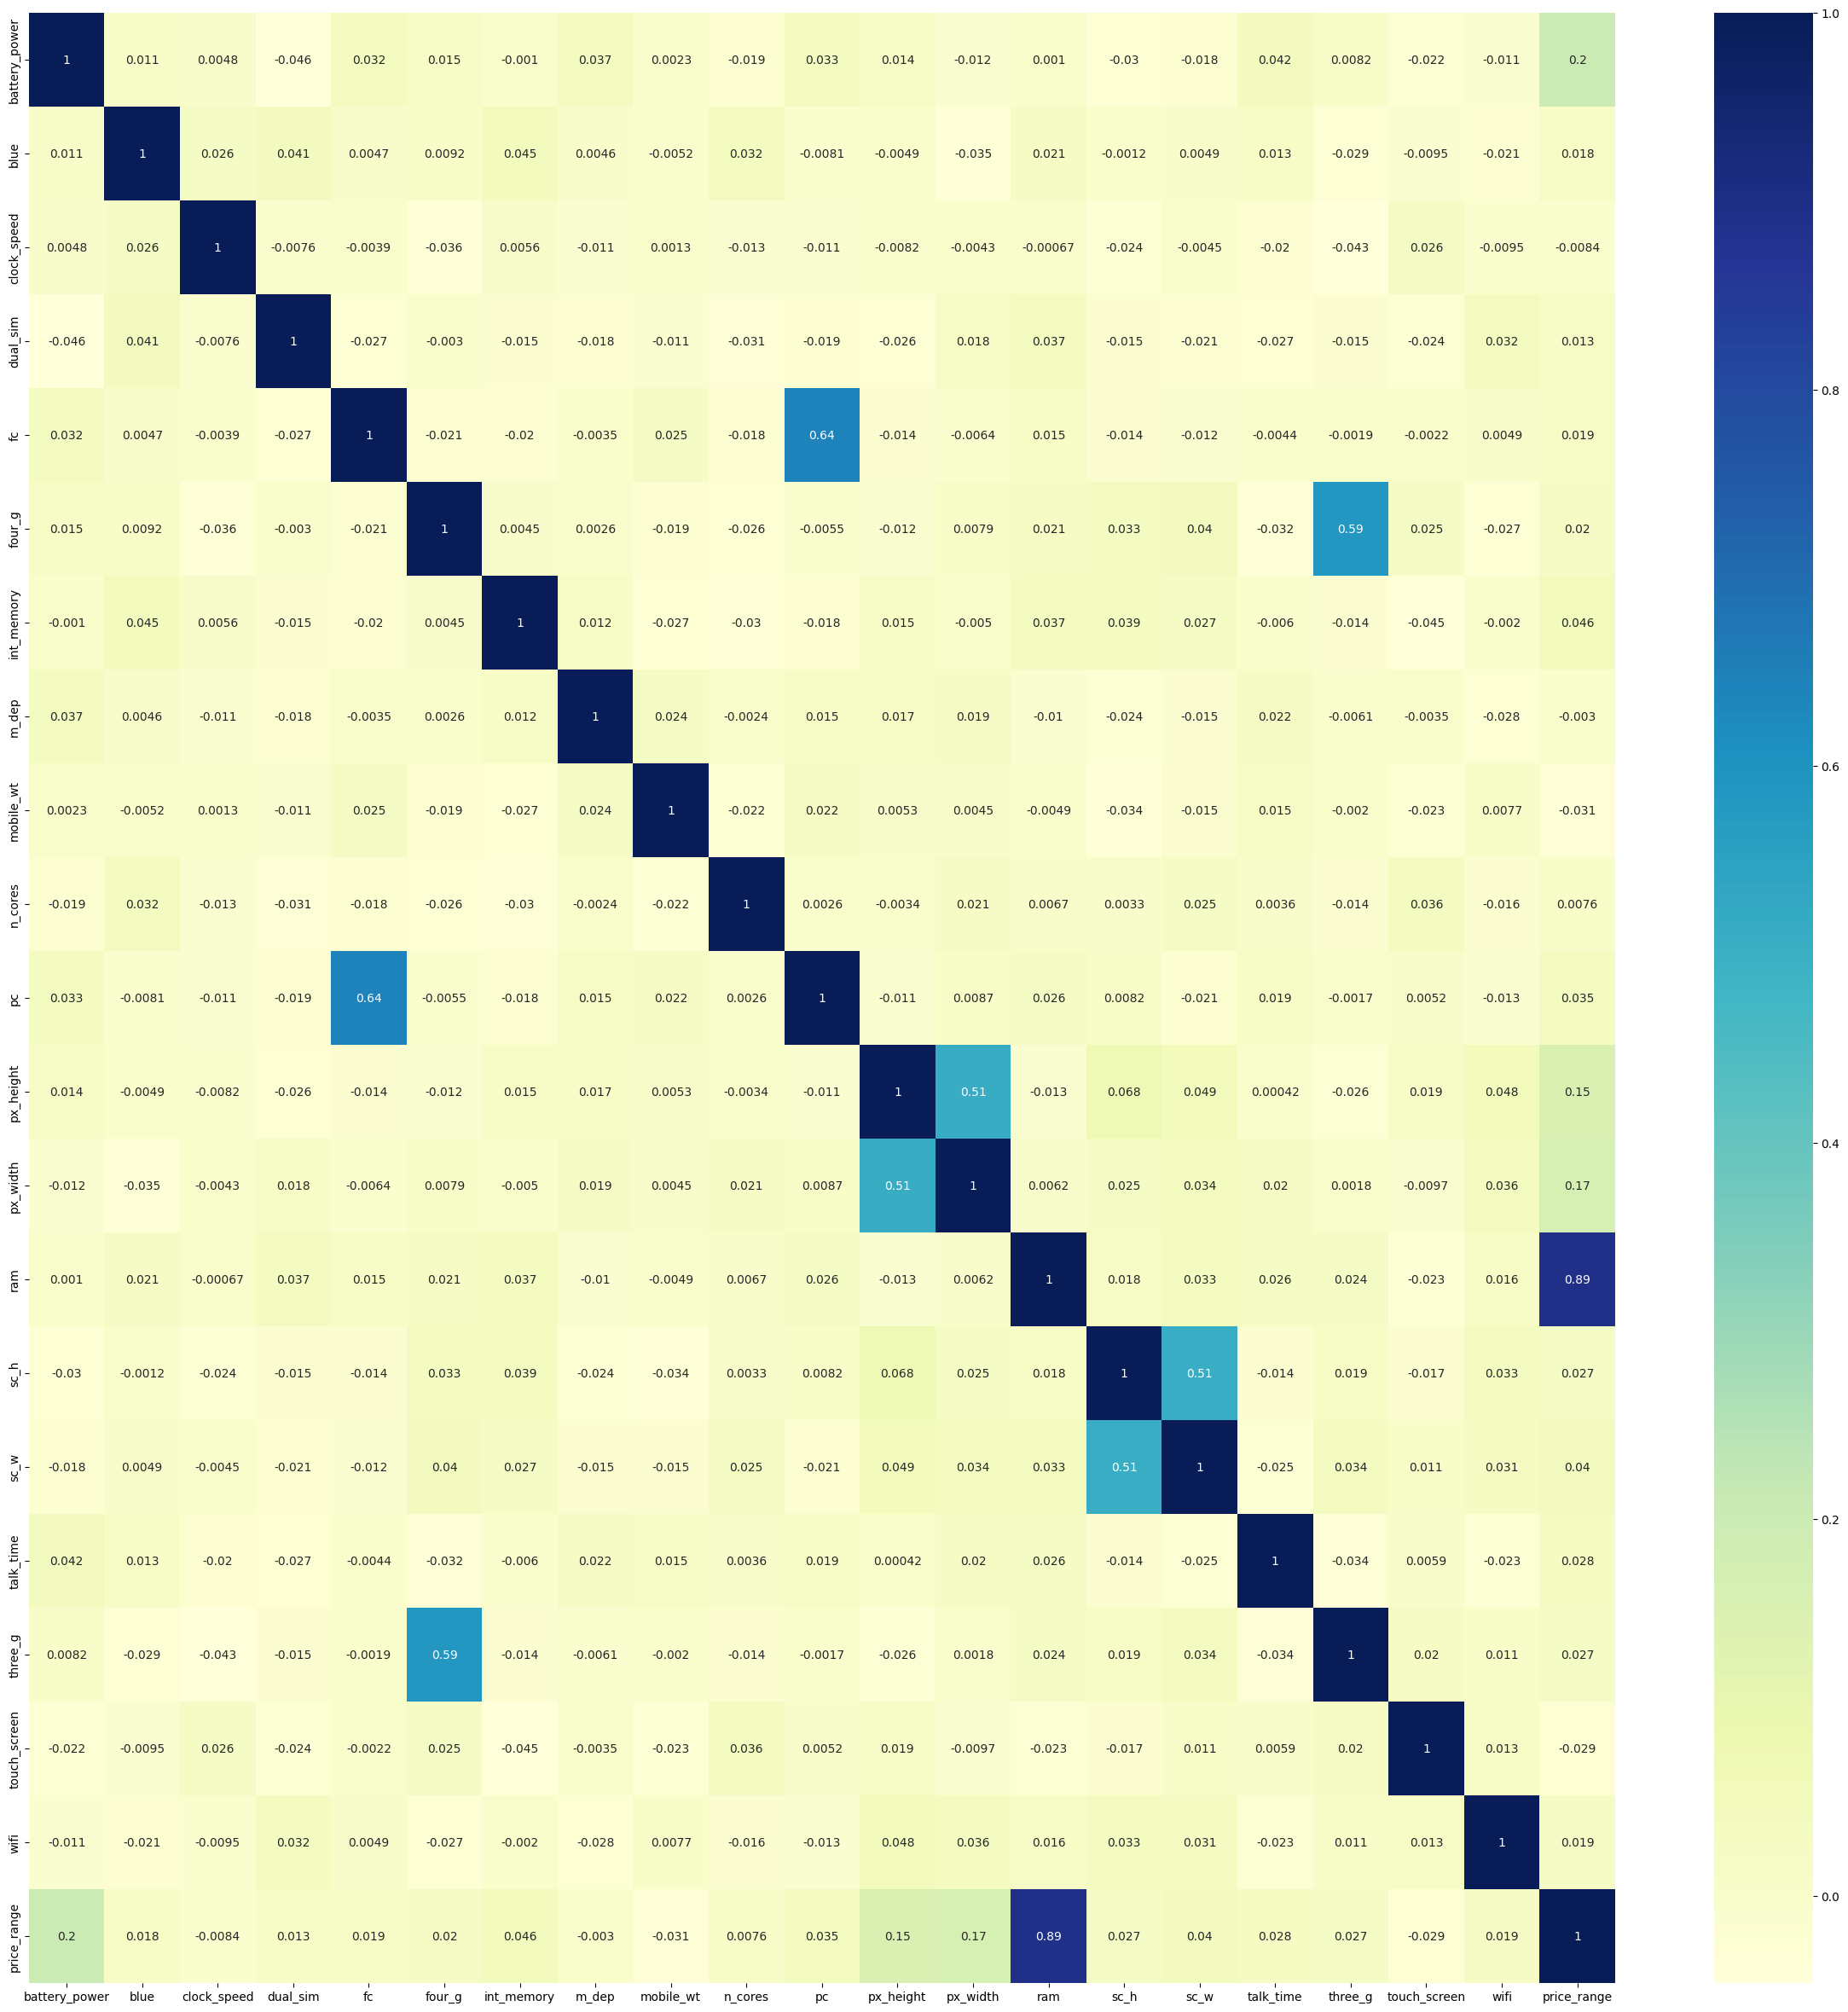

In [267]:
import seaborn as sb
import matplotlib.pyplot as mp

plt.figure(figsize=(30,30))

dataplot = sb.heatmap(data_mp.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

## [75] **Classification**

**Pada bagian ini Anda akan diminta untuk melakukan klasifikasi harga suatu mobile phone berdasarkan fitur-fitur yang sudah Anda pilih sebelumnya. Anda akan mencoba berbagai macam model klasifikasi seperti Decision Tree, Random Forest, Naive Bayes, dan K-nearest Neighbors untuk mencari model yang memiliki performa terbaik.**

### [3] Preparation

6\. [3] Buatlah model K-Fold Cross Validation yang akan digunakan untuk membagi dataset train dan test menjadi beberapa bagian (*fold*). Strategi ini akan Anda gunakan pada semua *classifier* dibandingkan dengan strategi sebelumnya yang hanya membagi data ke dalam data training dan testing menggunakan method `train_test_split`.

In [268]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from numpy import sqrt



def best(K_fold) :
  min_fix = 0
  max_fix = 0
  rmse_fix = 99999999
  K=0

  for i in range(2, K_fold):
      # define the test condition
      cv=KFold(n_splits=i, shuffle=True, random_state=1)

      # get the model
      model = LinearRegression()

      # evaluate the model
      scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

      scores = absolute(scores)
      accuracy = mean(scores)
      rmse = sqrt(accuracy)
      min_scores = scores.min()
      max_scores = scores.max()

      if rmse< rmse_fix:
          K = i
          min_fix = min_scores
          max_fix = max_scores
          rmse_fix = rmse

  print("Best K : " + str(K))
  print("Best RMSE : " + str(rmse_fix))
  print("Minimal score : " + str(min_fix))
  print("Maximal score : " + str(max_fix))

  return K, rmse_fix, min_fix, max_fix
   

K, rmse_fix, min_fix, max_fix = best(31)

Best K : 3
Best RMSE : 0.40135690179063255
Minimal score : 0.15054801338891194
Maximal score : 0.170883639787944


In [269]:
from sklearn.model_selection import KFold # import KFold

kf = KFold(n_splits=K) # Define the split - into 2 folds 

In [270]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [271]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [272]:
from sklearn.metrics import accuracy_score

def evaluate_model(model_predict, X, y, X_test, y_test):
	# evaluate the model
	cv=KFold(n_splits=K, shuffle=True, random_state=1)
	scores = cross_val_score(model_predict, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	# return scores
	return mean(scores), accuracy_score(y_test, model_predict.predict(X_test))

### [19] Decision Tree

In [273]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, precision_score, recall_score, classification_report, accuracy_score, f1_score
def metrics(prediction):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

def metrics2(prediction,y_test):
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    print("Butuh informasi lebih lengkap? silakan simak di bawah ini : ")
    print("Akurasi:", accuracy_score(y_test, prediction))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

7\. [4] Implementasikan model Decision Tree tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [305]:
from sklearn.tree import DecisionTreeClassifier

dt_md1 = DecisionTreeClassifier()
dt_md1.fit(X_train, y_train)
accuracy_avg, accuracy_model = evaluate_model(dt_md1, X_train, y_train, X_test, y_test)

print("Accuracy average of Train: " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average of Train: 0.8078445929225441
Accuracy model : 0.826151560178306


8\. [4] Implementasikan model Decision Tree dengan memberikan parameter nilai `min_samples_leaf=50`; serta berikan hasil evaluasinya!

In [275]:
dt_md2 = DecisionTreeClassifier(min_samples_leaf=50)
dt_md2.fit(X_train, y_train)

accuracy_avg, accuracy_model = evaluate_model(dt_md2, X_train, y_train, X_test, y_test)

print("Accuracy average : " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average : 0.70327146745855
Accuracy model : 0.7236255572065379


9\. [6] Bandingkan model yang dibuat pada soal nomor 7 dan nomor 8, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Diketahui dari perbandingan nomor 7 dan nomor 8, hasil akurasi pada nomor 7 lebih baik. Hal itu dapat kita lihat pada nomor 8 terdapat parameter min_samples_leaf=50 yang menyebabkan apabila ingin membentuk node baru, harus ada 50 value yang masuk ke node tersebut. Sedangkan pada nomor 7 menggunakan min_samples_leaf default, yaitu 1.Dengan demikian, hasil node-node yang terbentuk akan lebih akurat karena pada nomor 7 diizinkan apabila suatu node hanya memiliki 1 value

10\. [5] Buatlah model yang memiliki performa yang lebih bagus dibanding kedua model sebelumnya! Anda dibebaskan untuk melakukan eksplorasi dalam mengkonfigurasi parameter yang dipakai.

In [302]:
param_grid = {
                'criterion' : ['gini', 'entropy'],
               'max_depth' : [20, None],
               'max_leaf_nodes' : [100, None],
               'min_samples_leaf': [1,2],

               

               }

dt = DecisionTreeClassifier()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, None], 'max_leaf_nodes': [100, None],
                         'min_samples_leaf': [1, 2]})

In [303]:
display(clf.best_params_)

{'criterion': 'entropy',
 'max_depth': 20,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1}

In [293]:
dt_md3 = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, max_depth=20)
dt_md3.fit(X_train, y_train)

accuracy_avg, accuracy_model = evaluate_model(dt_md3, X_train, y_train, X_test, y_test)

print("Accuracy average : " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average : 0.8249212241194424
Accuracy model : 0.8306092124814265


### [18] Random Forest

11\. [4] Implementasikan model Random Forest tanpa konfigurasi parameter apapun, serta berikan hasil evaluasinya!

In [279]:
from sklearn.ensemble import RandomForestClassifier

rf_md = RandomForestClassifier()
rf_md.fit(X_train, y_train)

accuracy_avg, accuracy_model = evaluate_model(rf_md, X_train, y_train, X_test, y_test)

print("Accuracy average : " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average : 0.874613544502186
Accuracy model : 0.861812778603269


12\. [8] Implementasikan model Random Forest dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [289]:
param_grid = {
               'criterion' : ['gini', 'log_loss'],
               'max_depth' : [20, None],
               'max_leaf_nodes' : [100, None],
               }

dt = RandomForestClassifier()

clf = GridSearchCV(estimator= dt, 
                   param_grid=param_grid, cv= 5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'log_loss'],
                         'max_depth': [20, None],
                         'max_leaf_nodes': [100, None]})

In [290]:
display(clf.best_params_)

{'criterion': 'log_loss', 'max_depth': None, 'max_leaf_nodes': 100}

In [282]:
rf_md2 = RandomForestClassifier(criterion='log_loss', max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=2, max_depth=None)
rf_md2.fit(X_train, y_train)
accuracy_avg, accuracy_model = evaluate_model(rf_md2, X_train, y_train, X_test, y_test)

print("Accuracy average : " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average : 0.8731320630207046
Accuracy model : 0.8811292719167905


13\. [6] Bandingkan model yang dibuat pada soal nomor 11 dan nomor 12, manakah yang lebih baik? Berikan analisis Anda terkait bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil klasifikasi!

> Jawaban: 

> Diketahui nomor 12 memiliki tingkat akurasi yang lebih baik dibanding nomor 11. Pada nomor 12 saya merubah beberapa nilai parameter dari nilai defaultnya. Misalnya pada max leaf node=100 yang dimana secara default itu None sehingga node yang dihasilkan tidak unlimited. Dengan demikian kita bisa membatasi hasil klasifikasi sehingga klasifikasi yang dihasilkan lebih akurat. Selain itu saya menggunakan criterion=log_loss yang dimana secara default menggunakan gini yang dimana log loss menentukan probabilitas prediksi dengan nilai aktualnya. Dengan demikian, hasil yang terbuat akan lebih akurat karena cocok dengan bentuk datasetnya


### [16] Naive Bayes

14\. [4] Implementasikan model dari salah satu variasi Naive Bayes; serta berikan hasil evaluasinya!

In [283]:
clf = GaussianNB()
clf.fit(X_train, y_train)

accuracy_avg, accuracy_model = evaluate_model(clf, X_train, y_train, X_test, y_test)

print("Accuracy average : " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average : 0.7752206549533943
Accuracy model : 0.7682020802377415


15\. [6] Apa alasan dan pertimbangan Anda dalam memilih variasi tersebut dibandingkan variasi Naive Bayes lainnya? 

> Jawaban:

> Diketahui bahwa dataset ini bertipe numerik semua (int atau float) dan distribusi yang dimiliki oleh fitur-fitur tersebut cenderung normal. Dengan demikian penggunaan gausian naive bayes dinilai cocok. Gausian naive bayes cocok digunakan ketika kita memiliki asumsi bahwa semua variabel bersifat kontinu. Selain itu, saya menggunakan Gausian naive bayes karena nilai akurasinya lebihnya tinggi dibanding jenis naive bayes lainnya

16\. [6] Masing-masing variasi Naive Bayes dibuat khusus untuk menyesuaikan tipe data tertentu pada data yang digunakan. Jika data yang ada memiliki tipe fitur yang bervariasi (numerik, biner, kategorik, dll), apakah kita bisa menggunakan salah satu variasi algoritma saja? Bagaimana strategi Anda dalam menganani kasus tersebut?

> Jawaban:

> Hal yang dapat kita lakukan pertama adalah melakukan pengubahan data-data dari berbagai fitur menjadi jenis satu data yang sama, misalnya data kategorik menjadi numerik dengan cara melakukan encode. Setelah itu, kita dapat menganalisis bagaimana distiribusi datanya. apakah normal? multinomial? inbalanced? dan sebagainya. Setelah tahu itu, kita dapat memilih jenis naive bayes yang cocok untuk digunakan. Selain itu, alangkah baiknya mencoba berbagai variasi algoritma hingga menemukan model yang memiliki akurasi yang tinggi

### [12] K-nearest Neighbors

17\. [4] Implementasikan model KNN dengan memberikan parameter nilai `n_neighbors=3`; serta berikan hasil evaluasinya!

In [284]:
KNN = KNeighborsClassifier(n_neighbors=3) 
KNN.fit(X_train,y_train)

accuracy_avg, accuracy_model = evaluate_model(KNN, X_train, y_train, X_test, y_test)

print("Accuracy average : " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average : 0.8130396766476945
Accuracy model : 0.8335809806835067


18\. [8] Implementasikan model KNN dengan parameter yang didapatkan dari hasil Hyperparameter Tuning, serta berikan hasil evaluasinya!

In [285]:
model = KNeighborsClassifier()

# parameter yang akan di tunning
tunned_params = [
  { 
    'n_neighbors': [1,2,3,4,5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]
  } 
]

print("##### Tuning hyper-parameters model KNN #####")
print()

clfKNN = GridSearchCV(model, 
                    tunned_params,
                    scoring="accuracy",
                    cv=5,
                    verbose = 2
                    )

clfKNN.fit(X_train, y_train)

print("Best parameters set found on development set:")
print(clfKNN.best_params_)

##### Tuning hyper-parameters model KNN #####

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s


In [286]:
KNN = KNeighborsClassifier(n_neighbors=12) 
KNN.fit(X_train,y_train)

accuracy_avg, accuracy_model = evaluate_model(KNN, X_train, y_train, X_test, y_test)

print("Accuracy average : " + str(accuracy_avg))
print("Accuracy model : " + str(accuracy_model))

Accuracy average : 0.8442002804586325
Accuracy model : 0.8736998514115899


### [7] Analisis

19\. [7] Dari keempat variasi model (Decision Tree, Random Forest, Naive Bayes, dan KNN) yang sudah Anda coba, manakah model yang memiliki performa terbaik? Berikan analisis Anda!

> Jawaban:

>  Performa dari yang model tertinggi sampai terendah pada accuracy model (prediciton pada testing data):
1. Random Forest : 88% 
2. KNN : 87% 
3. Decision tree :83% 
4. Naive bayes : 76% 

>  Performa dari yang model tertinggi sampai terendah pada accuracy avg (average cross validation accuracy):
1. Random Forest : 87% 
2. KNN : 84% 
3. Decision tree :83% 
4. Naive bayes : 77% 

Dengan demikian, dari kedua skor tersebut diketahui model dengan performa terbaik adalah random forest. Random forest dipastikan memiliki tingkat akurasi yang lebih baik dibandingkan decision tree karena algoritma pada random forest menggunakan penggabungan dari berbagai decision tree sehingga menemukan yang lebih optimal. Selain itu, random forest juga turut menangani masalah overfitting yang dapat disebabkan pada decision tree. Namun, diketahui juga bahwa menggunakan model random forest atau pun KNN tidak terlalu memiliki perbedaan yang signifikan karean KNN bekerja dengan cara mengklasifikasi dengan tetangga terdekatnya. Masaalah ini muncul ketika menerapkan naive bayes yang memiliki akuras paling rendah. Hal itu disebabkan naive bayes mengasumsikan sebuah fitur tidak memiliki keterhubungan dengan fitur lainnya dengan demikian naive bayes kurang cocok diterapkan pada fitur yang memiliki korelasi. 